# RANDOM FOREST CLASSIFIER

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [3]:
#load the iris dataset
iris=load_iris()
X_class=iris.data
y_class=iris.target


In [4]:
#split the data for training and testing
Xc_train,Xc_test,yc_train,yc_test=train_test_split(X_class,y_class,test_size=0.3,random_state=42)

In [5]:
# Create Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
 

In [6]:
# Train the classifier
clf.fit(Xc_train, yc_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predict on test data
yc_pred = clf.predict(Xc_test)

In [8]:
# Evaluate classifier
print("\n=== Random Forest Classifier on Iris Dataset ===")
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("\nClassification Report:\n", classification_report(yc_test, yc_pred))


=== Random Forest Classifier on Iris Dataset ===
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Accuracy: 0.9825
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



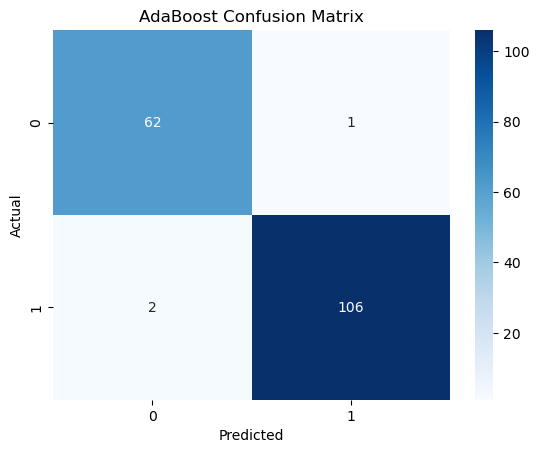


Gradient Boosting Accuracy: 0.9591
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



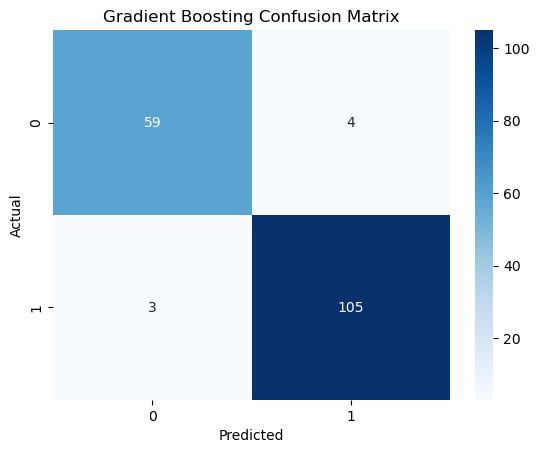

C:\Users\shiva\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:14:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



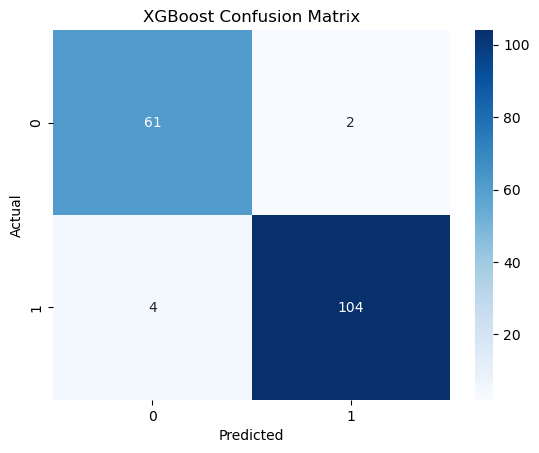

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3971
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

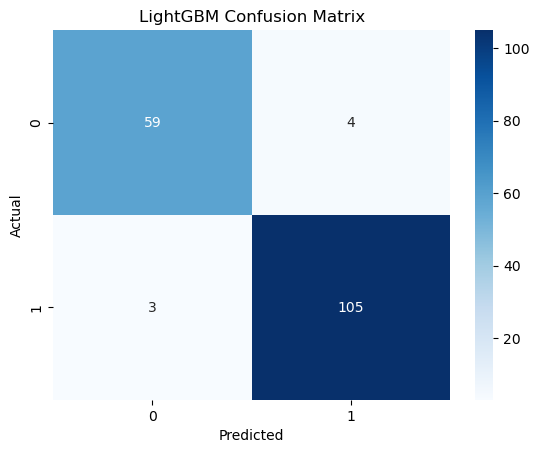

In [9]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Scikit-learn imports for preprocessing, model training, and evaluation
from sklearn.datasets import load_breast_cancer  # Binary classification dataset
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
 
#  Load Breast Cancer Dataset (binary classification problem)
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
 
#  Feature Scaling
# Scaling improves performance of many ML models by normalizing feature range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
#  Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
 
#  Helper function to evaluate models and print results
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
 
 
# AdaBoost (Adaptive Boosting)
# Combines multiple weak learners (like decision stumps) and updates weights to focus on misclassified points
from sklearn.ensemble import AdaBoostClassifier
 
ada = AdaBoostClassifier(n_estimators=100, random_state=42)  # n_estimators = number of weak learners
ada.fit(X_train, y_train)  # Train the model
evaluate_model(ada, "AdaBoost")  # Evaluate the model
 
 
#  Gradient Boosting
# Builds trees sequentially, minimizing the loss function by fitting new models to the residual errors
from sklearn.ensemble import GradientBoostingClassifier
 
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# learning_rate controls how much each tree contributes
gb.fit(X_train, y_train)
evaluate_model(gb, "Gradient Boosting")
 
 
#  XGBoost (Extreme Gradient Boosting)
# Advanced version of Gradient Boosting with regularization, speed, and performance improvements
!pip install xgboost -q
from xgboost import XGBClassifier
 
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
evaluate_model(xgb, "XGBoost")
 
 
# LightGBM (Light Gradient Boosting Machine)
# Gradient boosting that uses histogram-based algorithms for faster training, especially with large data
!pip install lightgbm -q
from lightgbm import LGBMClassifier
 
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
evaluate_model(lgb, "LightGBM")
